In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Zubeda\OneDrive\Documents\Sabiha\slash_mark\Give-Life-Predict-Blood-Donations-master\datasets\transfusion.data")

# Inspect the first few rows
print(df.head())

# Check data types and missing values
print(df.info())


   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      -------

In [8]:
df.columns = ["Recency", "Frequency", "Monetary", "Time", "Target"]


In [9]:
print(df.isnull().sum())  # No missing values


Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64


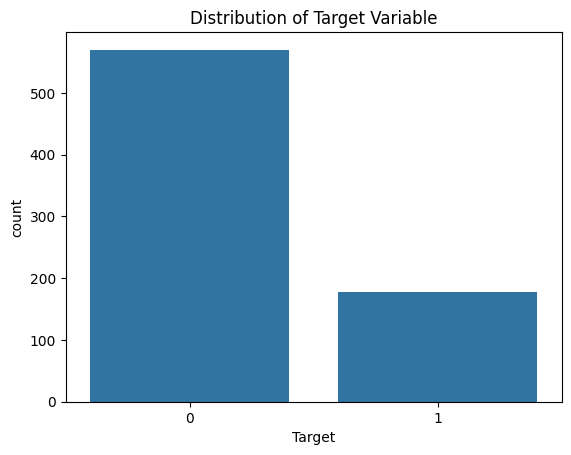

Target
0    0.762032
1    0.237968
Name: proportion, dtype: float64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Target"])
plt.title("Distribution of Target Variable")
plt.show()

print(df["Target"].value_counts(normalize=True))  # Check proportion of 1s and 0s


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Target"]))


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.76


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.72


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150



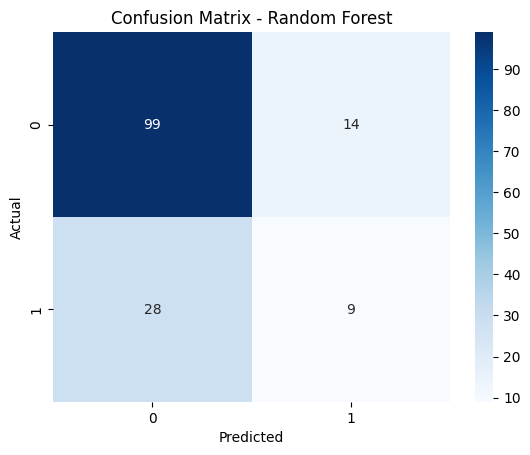

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_rf))

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [1]:
!pip install tpot


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=12019 sha256=b7261decf701d23320f9fc09138fbe9f501085f6dcdc0a50fe7eb2f6ad1a0467
  Stored in directory: c:\users\zubeda\appdata\local\pip\cache\wheels\da\77\2d\adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.model_selection import train_test_split

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Zubeda\OneDrive\Documents\Sabiha\slash_mark\Give-Life-Predict-Blood-Donations-master\datasets\transfusion.data")

# Rename columns for simplicity
df.columns = ["Recency", "Frequency", "Monetary", "Time", "Target"]

# Define features and target variable
X = df.drop(columns=["Target"])  # Features
y = df["Target"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train/Test split completed!")


Train/Test split completed!


In [7]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

print("TPOT Best Model Accuracy:", tpot.score(X_test, y_test))


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8060644257703082

Generation 2 - Current best internal CV score: 0.8060644257703082

Generation 3 - Current best internal CV score: 0.8060644257703082

Generation 4 - Current best internal CV score: 0.8060644257703082

Generation 5 - Current best internal CV score: 0.8060644257703082

Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.0001, learning_rate_init=0.01)
TPOT Best Model Accuracy: 0.7466666666666667


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [12]:
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_model.score(X_test, y_test))


Random Forest Accuracy: 0.7266666666666667
